<a href="https://colab.research.google.com/github/Kehindeajayi01/Deep-Learning-with-IMDB-review/blob/master/ClassifyingMovieReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Obtain the IMDB Review data

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
train_data[0][:10]

17465344/17464789 [==============================] - 0s 0us/step


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

## Explore the data

In [0]:
print("Shape of the training data: {}".format(train_data.shape))
print("Shape of the testing data: {}".format(test_data.shape))


Shape of the training data: (25000,)
Shape of the testing data: (25000,)


## Description of the data
* The train_data and test_data is a series of reviews; each review is a list of word indices. train_labels and test_labels are list of 0s and 1s where 0 stands for negative and 1 stands for positive

In [2]:
print("First review in training data:{}".format(train_data[0][:10]))
print(train_labels[:10])

First review in training data:[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
[1 0 0 1 0 0 1 0 1 0]


## Decoding the first review from integers to words

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])
decode_review

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data
* You can't feed list of integers into a neural network. You have to turn your list into tensors. One way to do that is to encode the integer sequences into a binary matrix

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
x_train[0], train_labels, x_train.shape

(array([0., 1., 1., ..., 0., 0., 0.]),
 array([1, 0, 0, ..., 0, 1, 0]),
 (25000, 10000))

## Vectorize the labels

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Build your architecture
* This is where we specify the layers of the network.
* The number of hidden units within each layer and the activation function

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

## Compiling the model
* This is where we specify the optimizer (how the network will update the weight)
* The loss function (a measure of the performance of the network)
* An accuracy (metric to monitor)

In [0]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## Validating your approach
* We will set apart 10000 samples from the training data to validate our model so that we can have an idea how our model will perform on new unseen data.

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training the model
* We fit the model on the partial training set and validate on the validation set.
* We specify the epochs(the number of iteration on all training samples)
* We also specify the batch_size (a subset of the training samples to train at a single instance)

In [0]:
history = model.fit(partial_x_train, partial_y_train, epochs = 10, batch_size = 512,
          validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 110us/sample - loss: 0.5263 - acc: 0.7835 - val_loss: 0.4082 - val_acc: 0.8549
Epoch 2/10
15000/15000 [==============================] - 1s 90us/sample - loss: 0.3201 - acc: 0.8993 - val_loss: 0.3169 - val_acc: 0.8810
Epoch 3/10
15000/15000 [==============================] - 1s 89us/sample - loss: 0.2339 - acc: 0.9233 - val_loss: 0.2807 - val_acc: 0.8892
Epoch 4/10
15000/15000 [==============================] - 1s 90us/sample - loss: 0.1854 - acc: 0.9392 - val_loss: 0.2777 - val_acc: 0.8881
Epoch 5/10
15000/15000 [==============================] - 1s 89us/sample - loss: 0.1493 - acc: 0.9516 - val_loss: 0.2867 - val_acc: 0.8879
Epoch 6/10
15000/15000 [==============================] - 1s 91us/sample - loss: 0.1250 - acc: 0.9605 - val_loss: 0.2880 - val_acc: 0.8867
Epoch 7/10
15000/15000 [==============================] - 1s 88us/sample - loss: 0.1048 - acc: 0.9680 - val_loss: 0

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Plotting the training and validation loss

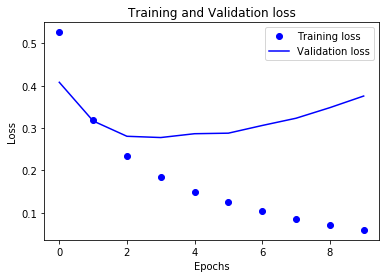

In [0]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(len(history_dict['acc']))
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.legend()
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Plotting the training and validation accuracy

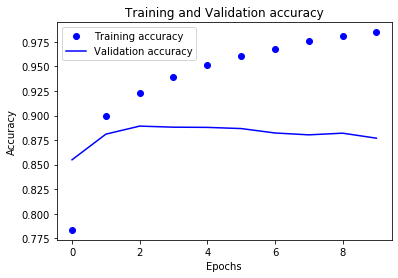

In [0]:
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

epochs = range(len(history_dict['acc']))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Using Word Embedding
- Word embedding tries to learn the weights of the embedding layer similarly to how you learn the weights of a neural network.
- It maps the geometric distance between word vectors to the associated word such that word with different meaning are embedded at points far from each other while related words are close. In other words, the geometric relationship between word vectors tend to reflect the semantic relationship between the corresponding words.
- It takes as input 2D tensor of integers (word index) and return a 3D float tensor which we can train a dense layer or an RNN on.

In [9]:
from tensorflow import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding

Using TensorFlow backend.


## Loading the IMDB data for use with an embedding layer
*  Embedding layer takes as input a 2D tensor of integers of shape (samples, sequence_length) and return a 3D floating-point tensor which can then be flatten to a 2D tensor to build a Dense layer on top for classification

In [0]:
max_features = 10000   # the top most frequent words
maxlen = 500    # sequence length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = pad_sequences(x_train, maxlen = maxlen)
x_test = pad_sequences(x_test, maxlen = maxlen)

In [0]:
x_train[:10], x_train.shape

(array([[   0,    0,    0, ...,   19,  178,   32],
        [   0,    0,    0, ...,   16,  145,   95],
        [   0,    0,    0, ...,    7,  129,  113],
        ...,
        [   4, 3231,  152, ...,   72,   33,   32],
        [   0,    0,    0, ...,   28,  126,  110],
        [   0,    0,    0, ...,    7,   43,   50]], dtype=int32), (25000, 500))

## Using an Embedding an a classifier on IMDB
* We want to learn 100 embedding dimensions

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
                    Embedding(10000, 100, input_length=maxlen),      # the 100 is the embedding dimension i.e the output dimension
                    Flatten(),
                    Dense(32, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1600032   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,600,065
Trainable params: 2,600,065
Non-trainable params: 0
_________________________________________________________________


## Compile the model and fit

In [0]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 512, epochs = 5, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 11s 525us/step - loss: 0.7561 - acc: 0.5913 - val_loss: 0.5775 - val_acc: 0.7004
Epoch 2/5
20000/20000 [==============================] - 10s 476us/step - loss: 0.3978 - acc: 0.8298 - val_loss: 0.3278 - val_acc: 0.8690
Epoch 3/5
20000/20000 [==============================] - 10s 476us/step - loss: 0.2100 - acc: 0.9231 - val_loss: 0.3082 - val_acc: 0.8708
Epoch 4/5
20000/20000 [==============================] - 9s 474us/step - loss: 0.1171 - acc: 0.9604 - val_loss: 0.3244 - val_acc: 0.8708
Epoch 5/5
20000/20000 [==============================] - 9s 471us/step - loss: 0.0600 - acc: 0.9829 - val_loss: 0.3498 - val_acc: 0.8672


## Using a Recurrent Neural Network
- RNN takes as input sequence of vectors of shape (batch_size, timesteps, input_features).
- It loops through sequence elements while maintaining the state containing the information it has seen so far.
- It starts by initializing the state as zero-vectors. Then use the current state t and input at t to obtain the output at t. Finally, it sets the next state as the previous output.
- RNNs suffer from the vanishing gradient problem becuase of repeated application of gradient of the weights. This often arises when the gradient of the largest weights is less than 1.

In [13]:
from keras.layers import SimpleRNN

model = Sequential([
                    Embedding(10000, 64),
                    SimpleRNN(64, return_sequences = True),
                    SimpleRNN(64, return_sequences = True),
                    SimpleRNN(32),
                    Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 64)          8256      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 659,649
Trainable params: 659,649
Non-trainable params: 0
_________________________________________________________________


## Compile the network

In [0]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## Fit the model

In [0]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 84s 4ms/step - loss: 0.6897 - acc: 0.5331 - val_loss: 0.6495 - val_acc: 0.6048
Epoch 2/5
20000/20000 [==============================] - 82s 4ms/step - loss: 0.4583 - acc: 0.7840 - val_loss: 0.4575 - val_acc: 0.7956
Epoch 3/5
20000/20000 [==============================] - 82s 4ms/step - loss: 0.2484 - acc: 0.9005 - val_loss: 0.5368 - val_acc: 0.7724
Epoch 4/5
20000/20000 [==============================] - 82s 4ms/step - loss: 0.1121 - acc: 0.9600 - val_loss: 0.9535 - val_acc: 0.6642
Epoch 5/5
20000/20000 [==============================] - 82s 4ms/step - loss: 0.0480 - acc: 0.9840 - val_loss: 0.9230 - val_acc: 0.7482


## Plotting the Accuracy against the epochs 
- This is to see how the model overfits and which epoch's value it starts overfitting

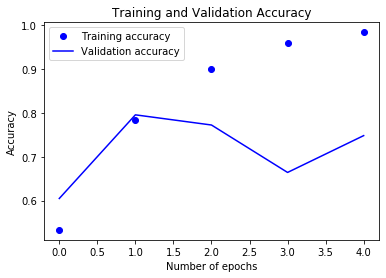

In [0]:
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

Epochs = range(len(acc_values))

plt.plot(Epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(Epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.legend(loc = 'best')
plt.title("Training and Validation Accuracy")
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

## Using the Long Short-Term Memory
- This behaves like an RNN, but also include a carry dataflow to carry information across multiple time steps, which helps combat the vanishing gradient problem.

In [0]:
from keras.layers import LSTM, Embedding

model = Sequential([
                    Embedding(10000, 64),
                    LSTM(64),
                    Dense(1, activation = 'sigmoid')

])

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


## Fit the model

In [19]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 8, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 135s 7ms/step - loss: 0.1030 - acc: 0.9640 - val_loss: 0.5610 - val_acc: 0.8694
Epoch 2/8
20000/20000 [==============================] - 135s 7ms/step - loss: 0.0953 - acc: 0.9674 - val_loss: 0.3985 - val_acc: 0.8724
Epoch 3/8
20000/20000 [==============================] - 136s 7ms/step - loss: 0.0899 - acc: 0.9689 - val_loss: 0.4140 - val_acc: 0.8736
Epoch 4/8
20000/20000 [==============================] - 136s 7ms/step - loss: 0.0793 - acc: 0.9725 - val_loss: 0.4022 - val_acc: 0.8736
Epoch 5/8
20000/20000 [==============================] - 134s 7ms/step - loss: 0.0685 - acc: 0.9765 - val_loss: 0.4531 - val_acc: 0.8752
Epoch 6/8
20000/20000 [==============================] - 134s 7ms/step - loss: 0.0638 - acc: 0.9787 - val_loss: 0.4946 - val_acc: 0.8752
Epoch 7/8
20000/20000 [==============================] - 134s 7ms/step - loss: 0.0575 - acc: 0.9814 - val_loss: 0.5588 - val_acc: